In [8]:
%pdb

Automatic pdb calling has been turned ON


# In this file we're going to translate a front view from the rover to a vertical map view by mapping 4 points.

<IPython.core.display.Javascript object>


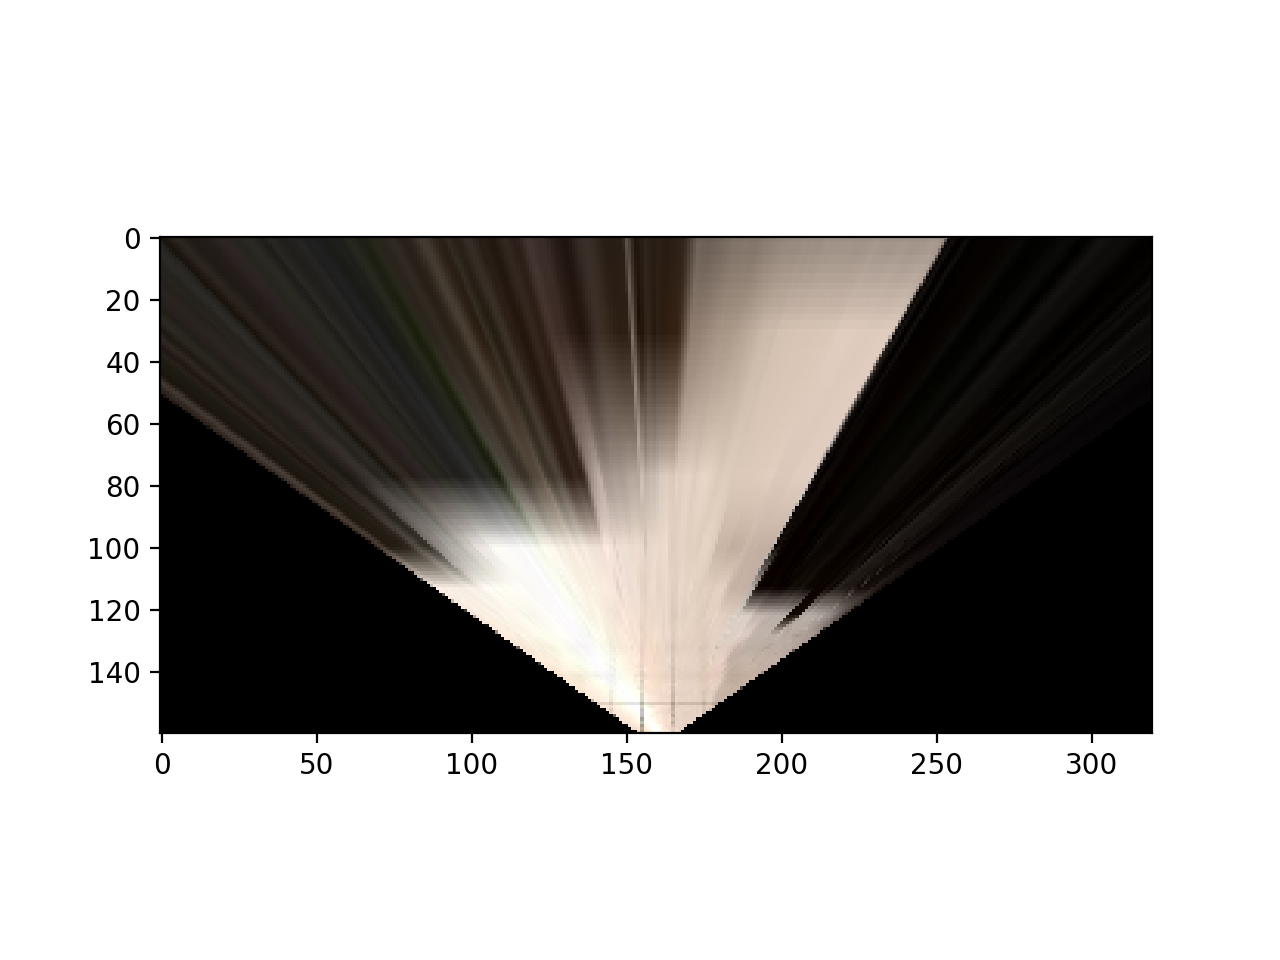

In [11]:
#Here we load a preview of the image to have a reference for the 4 points to select the surface to translate.
#%matplotlib notebook
import cv2 #OpenCV for perspective transform
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
# This enables the interactive matplotlib window
#%matplotlib notebook
image = mpimg.imread('example_grid1.jpg')
plt.imshow(image)
plt.show()

In [12]:
def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)

    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    
    # Return the result
    return warped

In [13]:
print(image.dtype, image.shape, np.min(image), np.max(image))

uint8 (160, 320, 3) 0 255


In [24]:
# Define source and destination points
transformed_size = 10

source = np.float32([[15,141], [118,96], [199,96], [300,141]])
destination = np.float32([[image.shape[1]/2-transformed_size/2,image.shape[0]], 
                          [image.shape[1]/2-transformed_size/2,image.shape[0]-transformed_size], 
                          [image.shape[1]/2+transformed_size/2,image.shape[0]-transformed_size], 
                          [image.shape[1]/2+transformed_size/2,image.shape[0]]])      

warped = perspect_transform(image, source, destination)
plt.imshow(warped)
plt.show()

In [25]:
destination

array([[ 155.,  160.],
       [ 155.,  150.],
       [ 165.,  150.],
       [ 165.,  160.]], dtype=float32)